In [1]:
import os
import shutil
import cv2
from skimage import io
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

from tqdm.notebook import tqdm

In [2]:
# Get all filenames
imgs = sorted(glob('imgs_aligned/20*'))

In [3]:
# Extract number of images
N_total = len(imgs)
N_total

7777

In [4]:
# Compute mean image to know the extent
imgs_subset = [io.imread(f) for f in tqdm(imgs[::100])]

  0%|          | 0/78 [00:00<?, ?it/s]

In [5]:
subset_mean = np.mean(imgs_subset, axis=0).astype('uint8')
del imgs_subset
subset_mean.shape

(2160, 3840, 3)

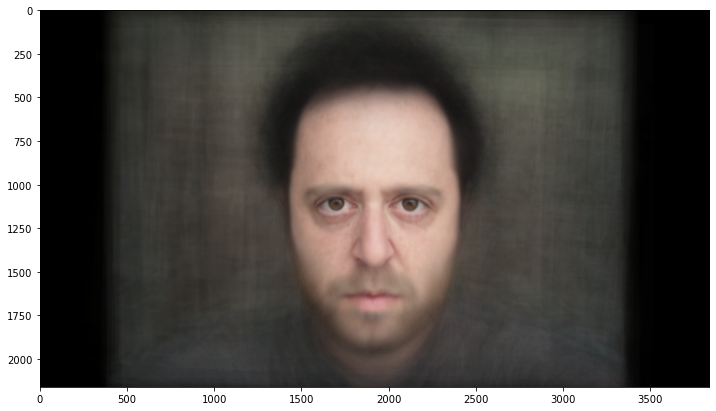

In [6]:
plt.figure(figsize=(12, 10))
plt.imshow(subset_mean);

(2000, 2000, 3)

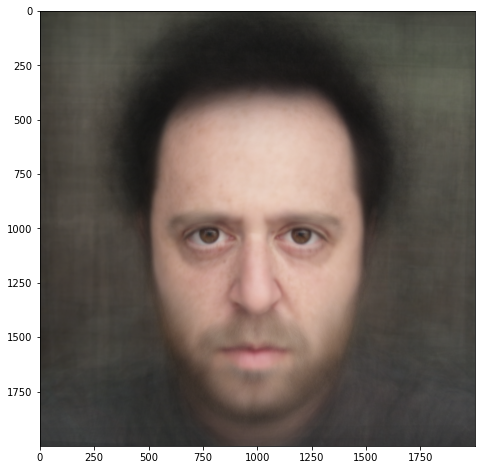

In [7]:
img_square = subset_mean[80:-80, 920:-920]
plt.figure(figsize=(8, 8))
plt.imshow(img_square);
img_square.shape

# Create images

In [80]:
for year in [str(y) for y in np.arange(2000, 2022)]:
    
    print(f'Computing year {year}.')
    
    imgs_year = [io.imread(f)[80:-80:10, 920:-920:10] for f in tqdm([i for i in imgs if f'/{year}' in i])]
    imgs_year = np.array(imgs_year)

    # Yearly full collage
    N = 19

    # Select all required images
    if len(imgs_year)<N**2:
        images = np.concatenate((imgs_year, np.zeros([N**2-len(imgs_year)]+ list(imgs_year[0].shape)).astype('uint8')), axis=0)
    else:
        images = imgs_year[:N**2]

    # Create yearly full collage
    collage = np.concatenate([np.concatenate(images[i*19:(i+1)*19], axis=1) for i in range(N)], axis=0)
    
    # Save file to output
    io.imsave(f'noah_year_{year}_full.jpg', collage)

Computing year 2001.


  0%|          | 0/362 [00:00<?, ?it/s]

Computing year 2002.


  0%|          | 0/363 [00:00<?, ?it/s]

Computing year 2003.


  0%|          | 0/349 [00:00<?, ?it/s]

Computing year 2004.


  0%|          | 0/366 [00:00<?, ?it/s]

Computing year 2005.


  0%|          | 0/365 [00:00<?, ?it/s]

Computing year 2006.


  0%|          | 0/365 [00:00<?, ?it/s]

Computing year 2007.


  0%|          | 0/365 [00:00<?, ?it/s]

Computing year 2008.


  0%|          | 0/366 [00:00<?, ?it/s]

Computing year 2009.


  0%|          | 0/364 [00:00<?, ?it/s]

Computing year 2010.


  0%|          | 0/364 [00:00<?, ?it/s]

Computing year 2011.


  0%|          | 0/364 [00:00<?, ?it/s]

Computing year 2012.


  0%|          | 0/365 [00:00<?, ?it/s]

Computing year 2013.


  0%|          | 0/365 [00:00<?, ?it/s]

Computing year 2014.


  0%|          | 0/365 [00:00<?, ?it/s]

Computing year 2015.


  0%|          | 0/364 [00:00<?, ?it/s]

Computing year 2016.


  0%|          | 0/365 [00:00<?, ?it/s]

Computing year 2017.


  0%|          | 0/364 [00:00<?, ?it/s]

Computing year 2018.


  0%|          | 0/364 [00:00<?, ?it/s]

Computing year 2019.


  0%|          | 0/364 [00:00<?, ?it/s]

Computing year 2020.


  0%|          | 0/366 [00:00<?, ?it/s]

Computing year 2021.


  0%|          | 0/163 [00:00<?, ?it/s]